In [32]:
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np

# Filtro RL

In [33]:
Vi = [1.03, 1.03, 1.03, 1.03, 1.03, 1.03, 1.04, 1.04, 1.05, 1.05, 1.06, 1.06, 1.06, 1.07, 1.07, 1.08, 1.09, 1.09, 1.10, 1.11, 1.11, 1.12, 
1.13, 1.13, 1.14, 1.14, 1.15, 1.16, 1.16, 1.17, 1.18, 1.18, 1.19, 1.20, 1.20, 1.21, 1.21, 1.22, 1.22, 1.23, 1.23, 1.24, 1.24, 1.25, 1.25, 
1.26, 1.26, 1.26, 1.27, 1.27, 1.28]
len(Vi)

51

In [34]:
Vo = [0.0688, 0.0769, 0.0972, 0.124, 0.154, 0.185, 0.216, 0.250, 0.282, 0.315, 0.346, 0.376, 0.408, 0.438, 0.467, 0.496, 0.524, 0.551,
0.578, 0.601, 0.626, 0.650, 0.674, 0.696, 0.720, 0.741, 0.762, 0.782, 0.802, 0.823, 0.842, 0.859, 0.875, 0.894, 0.908, 0.925, 0.940,
0.954, 0.967, 0.981, 0.994, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.10]
len(Vo)

51

In [35]:
K = []
for i in range(len(Vi)):
    K.append(Vo[i] / Vi[i])

K

[0.06679611650485437,
 0.07466019417475728,
 0.09436893203883494,
 0.1203883495145631,
 0.14951456310679612,
 0.1796116504854369,
 0.20769230769230768,
 0.24038461538461536,
 0.2685714285714285,
 0.3,
 0.3264150943396226,
 0.35471698113207545,
 0.38490566037735846,
 0.40934579439252333,
 0.43644859813084114,
 0.4592592592592592,
 0.4807339449541284,
 0.5055045871559634,
 0.5254545454545454,
 0.5414414414414414,
 0.5639639639639639,
 0.5803571428571428,
 0.5964601769911505,
 0.6159292035398231,
 0.6315789473684211,
 0.65,
 0.662608695652174,
 0.6741379310344828,
 0.6913793103448277,
 0.7034188034188035,
 0.7135593220338983,
 0.7279661016949153,
 0.7352941176470589,
 0.745,
 0.7566666666666667,
 0.7644628099173554,
 0.7768595041322314,
 0.781967213114754,
 0.7926229508196722,
 0.7975609756097561,
 0.808130081300813,
 0.8145161290322581,
 0.8225806451612904,
 0.8240000000000001,
 0.8320000000000001,
 0.8333333333333334,
 0.8412698412698413,
 0.8492063492063493,
 0.8503937007874016,
 0.858

In [36]:
fase = [3.96, 25.2, 41.0, 50.2, 55.4, 60.3, 60.8, 61.0, 61.4, 62.3, 62.5, 59.4, 58.7, 57.6, 56.9, 56.7, 54.2, 53.2, 52.5, 51.3, 49.9, 49.2, 48.9, 
47.3, 46.7, 45.9, 45.8, 44.0, 42.9, 42.3, 41.6, 40.2, 39.8, 39.2, 38.5, 37.8, 36.9, 35.9, 34.9, 34.4, 33.8, 33.2, 32.8, 32.5, 31.7, 30.7, 30.4, 
30.2, 29.1, 28.8, 28.5]
len(fase)

51

In [37]:
f = [100, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000,
21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, 31000, 32000, 33000, 34000, 35000, 36000, 37000, 38000, 39000, 40000,
41000, 42000, 43000, 44000, 45000, 46000, 47000, 48000, 49000, 50000]
len(f)

51

##### Gráfico Amplitude Vout / Vi e magnitude

A fórmula utilizada para o cálculo da resposta em magnitude foi
$$
|H(\omega)| = \frac{\omega L}{\sqrt{(\omega L)^2 + R^2} }
$$

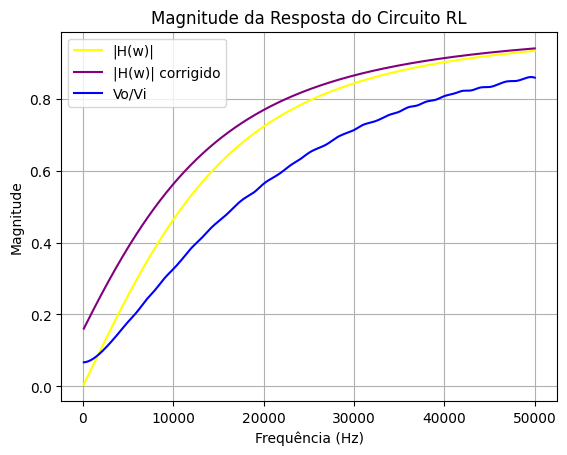

In [88]:
x = np.array(f)
y = np.array(K)

X_Y_Spline = make_interp_spline(x, y)

X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)

L = 1000*10**-6
R = 120
R_L = 18.9;
frequencias = np.linspace(100, 50000, 1000)
omega = 2 * np.pi * frequencias

H = (omega*L) / np.sqrt((R**2) + (omega * L)**2) 

H_corrigido = np.sqrt(((omega*L) + R_L)**2) / np.sqrt((R**2) + ((omega * L) + R_L)**2) 


plt.figure()
plt.plot(frequencias, H, color='yellow', label='|H(w)|')
plt.plot(frequencias, H_corrigido, color='purple', label='|H(w)| corrigido')
plt.plot(X_, Y_, color='blue', label='Vo/Vi')
plt.title('Magnitude da Resposta do Circuito RL')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)
plt.show()

##### Gráfico Fase
A fómula utilizada para calcular a fase foi

$$
\phi = \frac{\pi}{2} - \tan^{-1}(\frac{\omega  L}{R})
$$

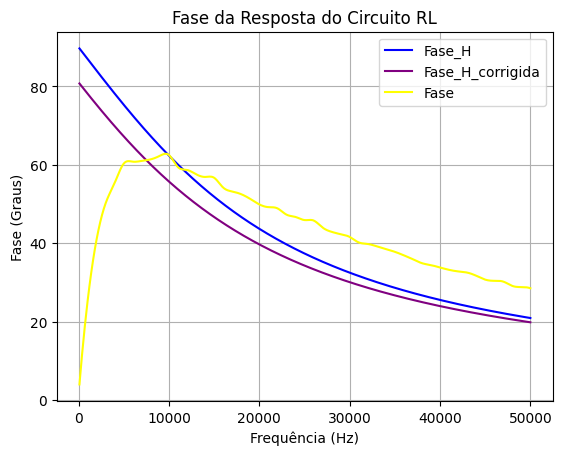

In [78]:
x = np.array(f)
y = np.array(fase)

X_Y_Spline = make_interp_spline(x, y)
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)

fase_H = (np.pi/2) - np.arctan((omega*L)/R)
fase_H = np.degrees(fase_H)

fase_H_corrigida = (np.pi/2) - np.arctan((omega*L + R_L)/(R))
fase_H_corrigida = np.degrees(fase_H_corrigida)

plt.figure()
plt.plot(frequencias, fase_H, color='blue', label='Fase_H')
plt.plot(frequencias, fase_H_corrigida, color='purple', label='Fase_H_corrigida')
plt.plot(X_, Y_, color='yellow', label='Fase')
plt.title('Fase da Resposta do Circuito RL')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Fase (Graus)')
plt.legend()
plt.grid(True)
plt.show()